In [32]:
import numpy as np
import warnings
import itertools
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.holtwinters import ExponentialSmoothing

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

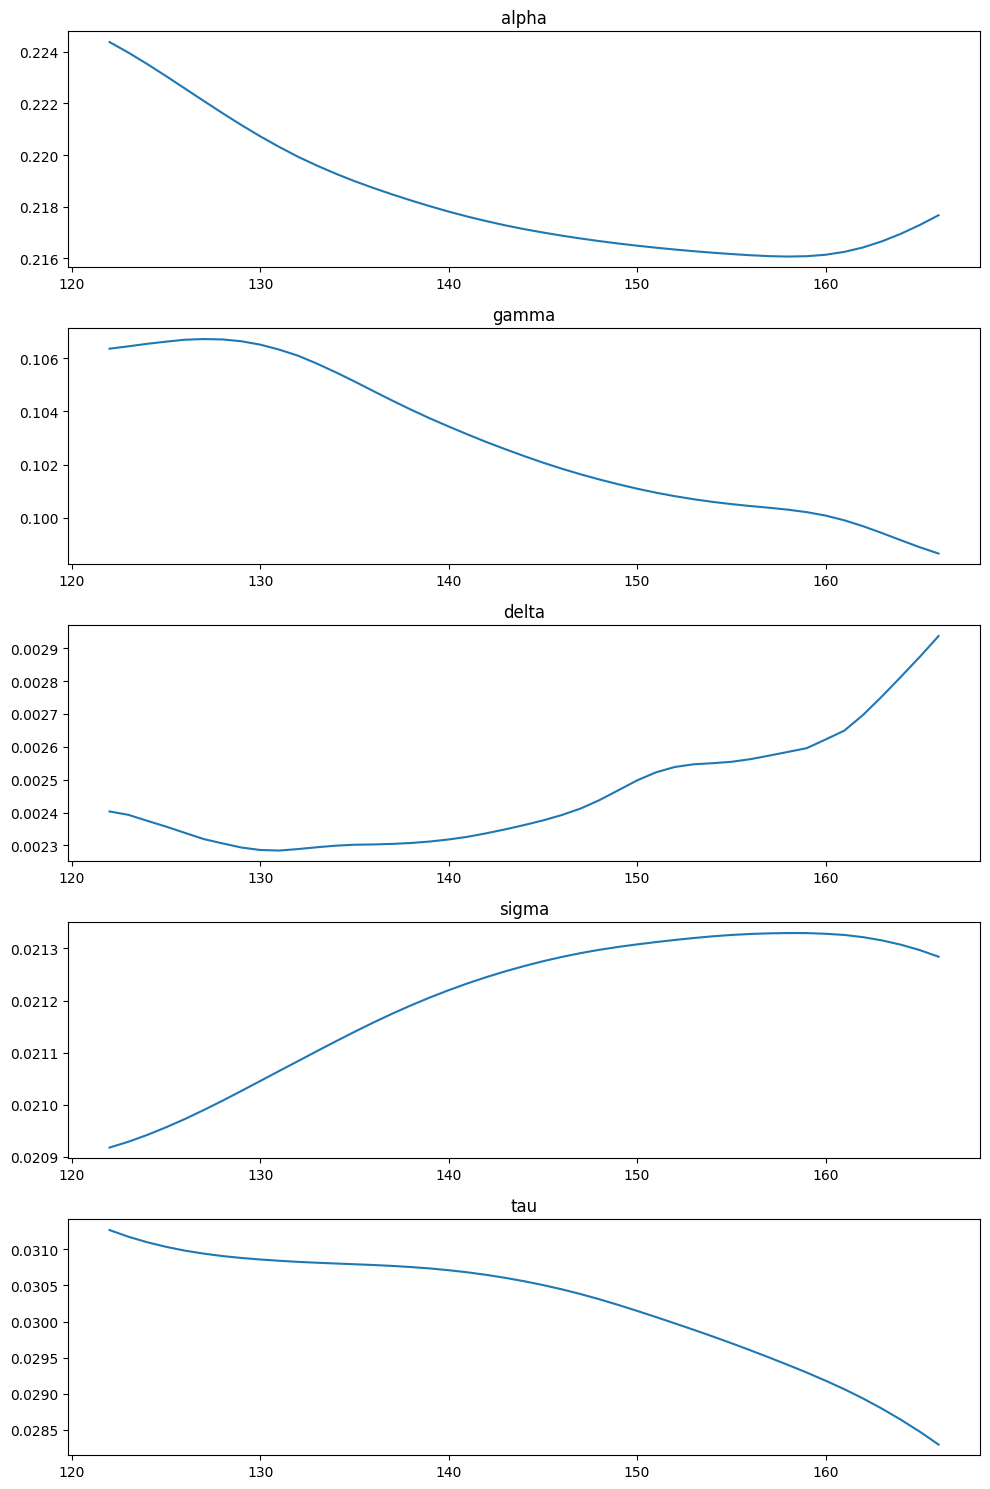

In [33]:
params = pd.read_csv('table_par.csv')
params.head
df = params[['alpha','gamma','delta','sigma','tau']] 
# Select only the rows between 0 and 167 (168 days) which are 8 week horizon on which our model has been fitted on MATLAB
df_sub = df.iloc[122:167]


# Plotting
fig, axs = plt.subplots(nrows=len(df_sub.columns), ncols=1, figsize=(10, 15))

for i, column in enumerate(df.columns):
    axs[i].plot(df_sub[column])
    axs[i].set_title(column)

plt.tight_layout()
plt.show()

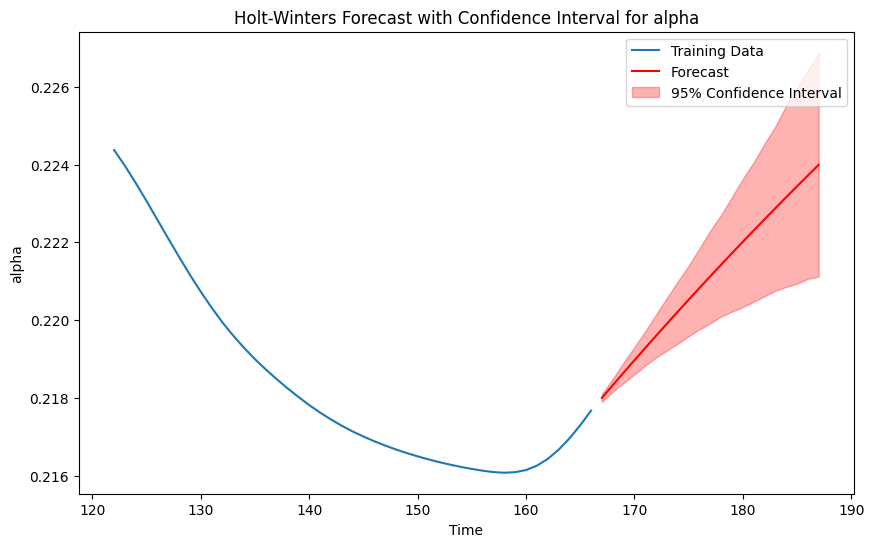

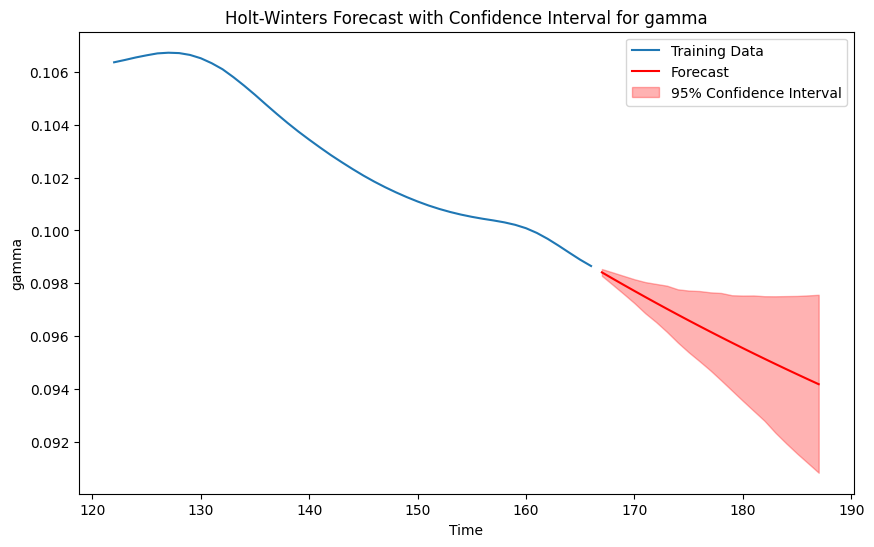

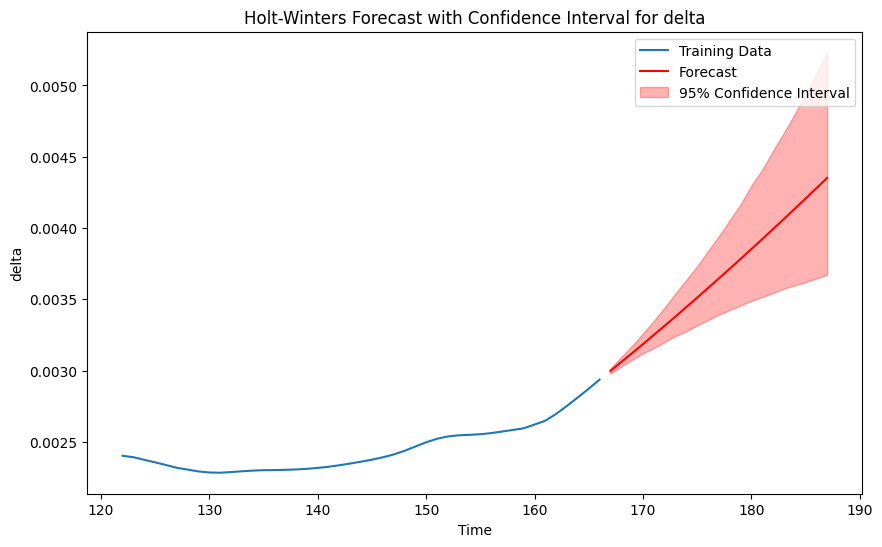

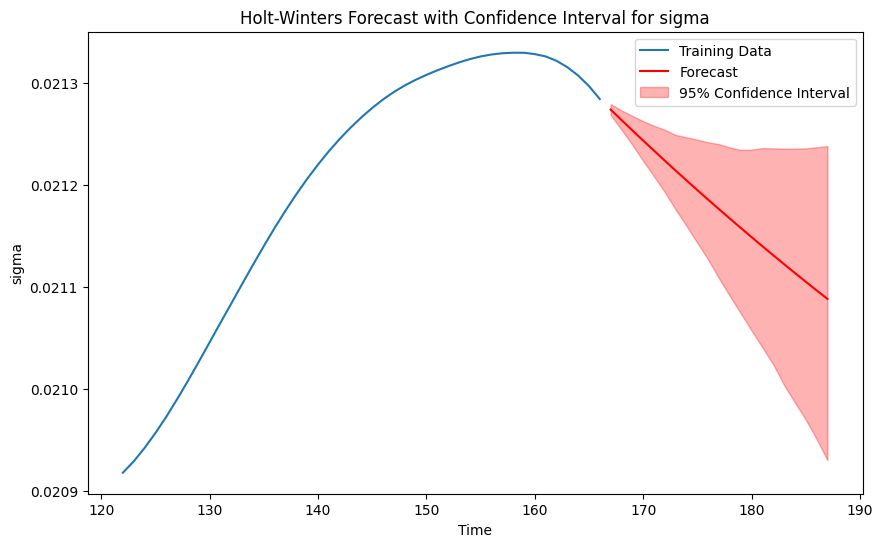

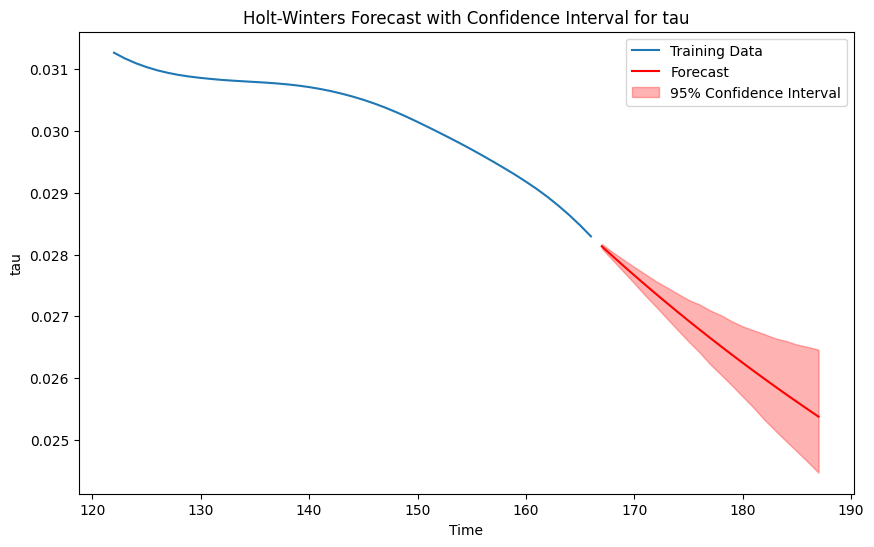

,alpha_yhat,alpha_yhat_lower,alpha_yhat_upper,gamma_yhat,gamma_yhat_lower,gamma_yhat_upper,delta_yhat,delta_yhat_lower,delta_yhat_upper,sigma_yhat,sigma_yhat_lower,sigma_yhat_upper,tau_yhat,tau_yhat_lower,tau_yhat_upper
16,0.222878,0.220756,0.224983,0.094953,0.092355,0.097512,0.004063,0.003575,0.004667,0.021122,0.021004,0.021235,0.025863,0.025151,0.026645
17,0.223161,0.220856,0.225518,0.094758,0.091953,0.097519,0.004134,0.003598,0.004799,0.021114,0.020987,0.021235,0.025739,0.024980,0.026601
18,0.223441,0.220937,0.225975,0.094566,0.091569,0.097524,0.004206,0.003621,0.004935,0.021105,0.020970,0.021236,0.025616,0.024815,0.026544
19,0.223719,0.221062,0.226418,0.094376,0.091206,0.097544,0.004278,0.003646,0.005083,0.021097,0.020951,0.021237,0.025495,0.024644,0.026505
20,0.223995,0.221122,0.226878,0.094188,0.090841,0.097568,0.004351,0.003673,0.005229,0.021088,0.020930,0.021238,0.025376,0.024468,0.026461


In [35]:
days_ahead = 21
forecasts = pd.DataFrame(index=np.arange(days_ahead))  # Creating an empty DataFrame with the right index

for param in ['alpha', 'gamma', 'delta', 'sigma', 'tau']:
    train_holt = df_sub[param]  # Training data for the current parameter

    # Fit the Holt-Winters Exponential Smoothing model
    hwmodel_damped = ExponentialSmoothing(train_holt, trend='mul', damped_trend=True, seasonal=None).fit(smoothing_trend=0.5)
    test_pred = hwmodel_damped.forecast(days_ahead)
    num_simulations = 1000
    simulated_paths = hwmodel_damped.simulate(nsimulations=days_ahead, repetitions=num_simulations, error='mul')
    lower_quantiles = np.percentile(simulated_paths, 2.5, axis=1)
    upper_quantiles = np.percentile(simulated_paths, 97.5, axis=1)
    
    test_pred_reset_index = test_pred.reset_index(drop=True)

    forecasts[f'{param}_yhat'] = test_pred_reset_index
    forecasts[f'{param}_yhat_lower'] = lower_quantiles
    forecasts[f'{param}_yhat_upper'] = upper_quantiles

    plt.figure(figsize=(10, 6))
    plt.plot(train_holt.index, train_holt, label='Training Data')
    plt.plot(test_pred.index, test_pred, label='Forecast', color='red')
    plt.fill_between(test_pred.index, lower_quantiles, upper_quantiles, color='red', alpha=0.3, label='95% Confidence Interval')
    plt.xlabel('Time')
    plt.ylabel(param)
    plt.title(f'Holt-Winters Forecast with Confidence Interval for {param}')
    plt.legend()
    plt.show()

# Save the DataFrame to CSV
forecasts.to_csv('Holt_forecasts21d_with_CI.csv', index=True)

forecasts.tail()


17:35:53 - cmdstanpy - INFO - Chain [1] start processing
17:35:54 - cmdstanpy - INFO - Chain [1] done processing
17:35:54 - cmdstanpy - INFO - Chain [1] start processing
17:35:54 - cmdstanpy - INFO - Chain [1] done processing
17:35:54 - cmdstanpy - INFO - Chain [1] start processing
17:35:55 - cmdstanpy - INFO - Chain [1] done processing
17:35:56 - cmdstanpy - INFO - Chain [1] start processing
17:35:56 - cmdstanpy - INFO - Chain [1] done processing
17:35:56 - cmdstanpy - INFO - Chain [1] start processing
17:35:56 - cmdstanpy - INFO - Chain [1] done processing
/Users/marcodelloro/PycharmProjects/pythonProject3/venv/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/marcodelloro/PycharmProjects/pythonProjec

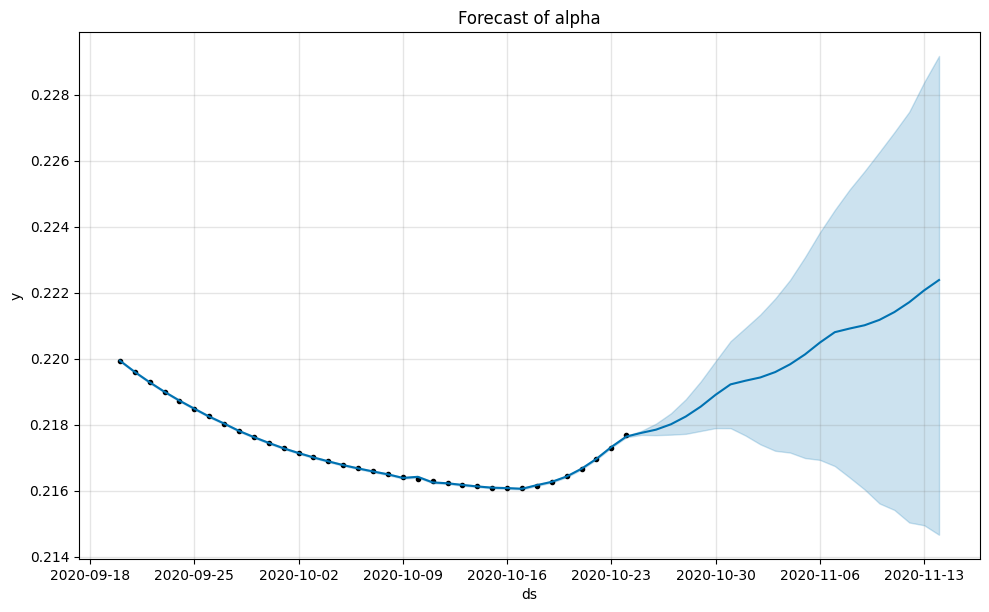

/Users/marcodelloro/PycharmProjects/pythonProject3/venv/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/marcodelloro/PycharmProjects/pythonProject3/venv/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


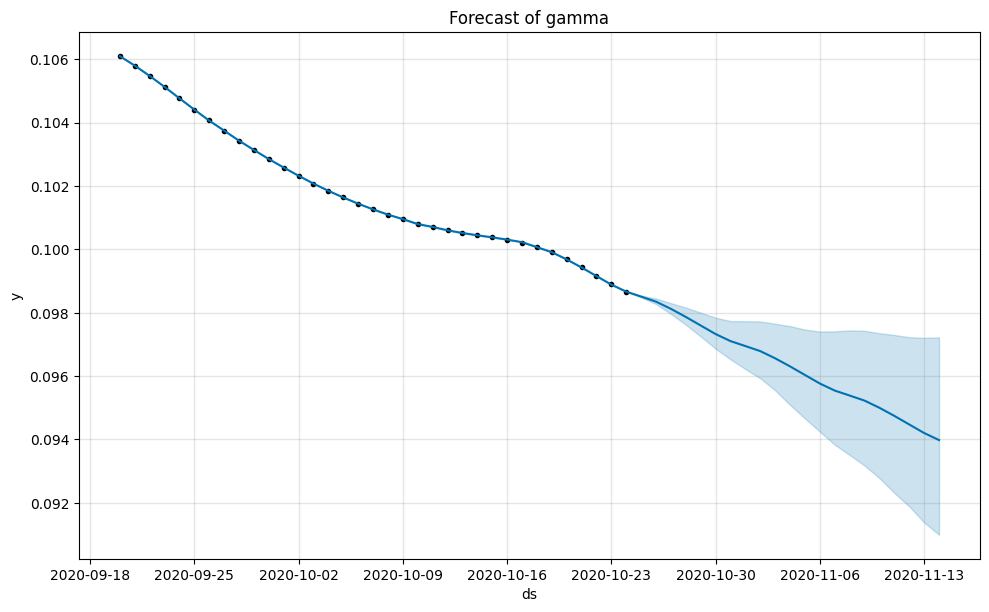

/Users/marcodelloro/PycharmProjects/pythonProject3/venv/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/marcodelloro/PycharmProjects/pythonProject3/venv/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


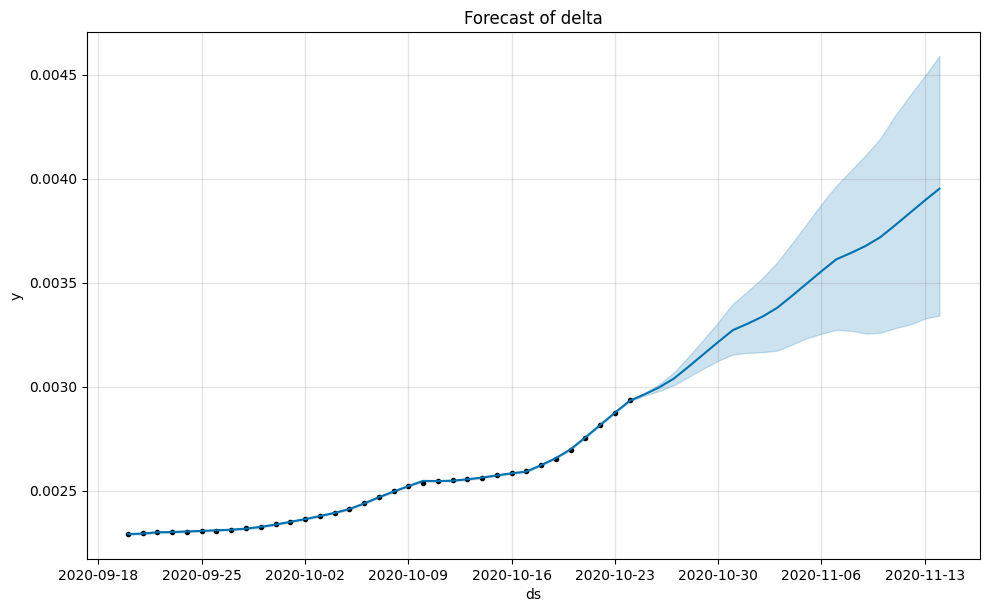

/Users/marcodelloro/PycharmProjects/pythonProject3/venv/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/marcodelloro/PycharmProjects/pythonProject3/venv/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


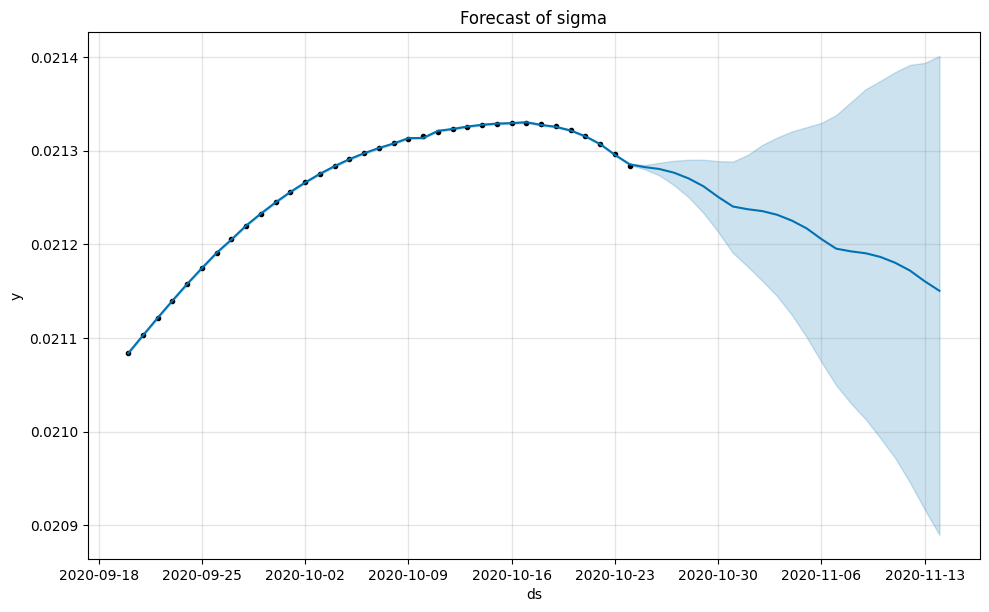

/Users/marcodelloro/PycharmProjects/pythonProject3/venv/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/marcodelloro/PycharmProjects/pythonProject3/venv/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


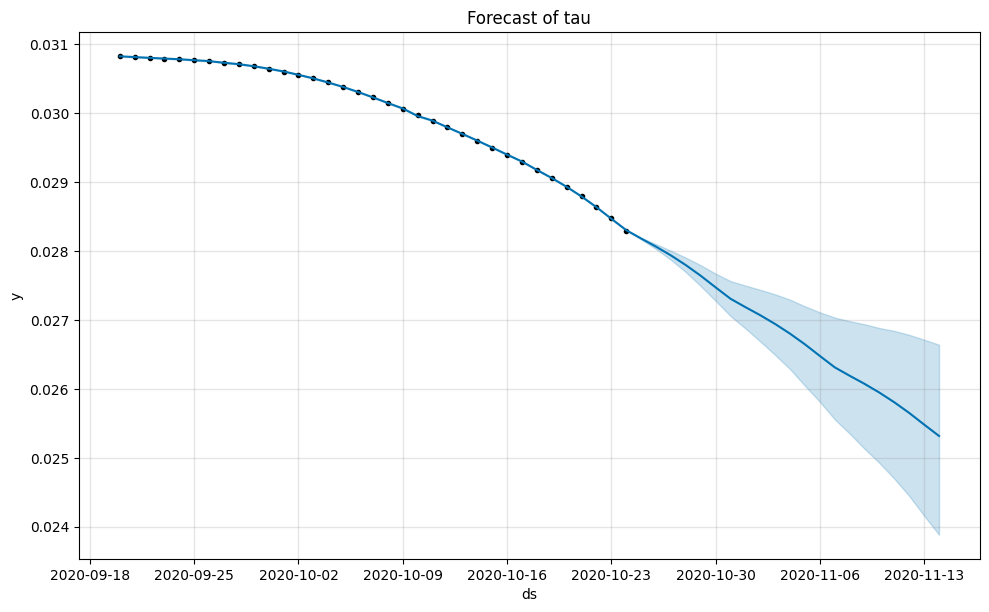

In [95]:
# Prediction with Prophet 
from prophet import Prophet

date_range = pd.date_range(start='2020-09-20', periods=167)
date_short = pd.date_range(start='2020-09-20', periods=35)

# Forecast each parameter separately
params_to_forecast = ['alpha', 'gamma', 'delta', 'sigma', 'tau']

# Dictionary to store models and forecasts
models = {}
forecasts = {}

df = pd.DataFrame({
    'ds': date_range,
    'alpha': df_sub['alpha'],
    'gamma': df_sub['gamma'],
    'delta': df_sub['delta'],
    'sigma': df_sub['sigma'],
    'tau': df_sub['tau']
    })
tailsize = 35
days_ahead = 21
df_short = df.tail(tailsize)

for param in params_to_forecast:
    # Prepare the DataFrame for Prophet
    fitProphet = pd.DataFrame({
        'ds': date_short,
        'y': df_short[param]
    })

    # Fit the Prophet model
    m = Prophet()
    m.fit(fitProphet)
    future = m.make_future_dataframe(periods=days_ahead)
    forecast = m.predict(future)
    models[param] = m
    forecasts[param] = forecast

combined_forecast = pd.DataFrame()
for param in params_to_forecast:
    fig = models[param].plot(forecasts[param])
    plt.title(f'Forecast of {param}')
    plt.show()
    last_21_forecast = forecasts[param][['yhat', 'yhat_lower', 'yhat_upper']].tail(21).reset_index(drop=True)
    last_21_forecast.columns = [f'{param}_yhat', f'{param}_yhat_lower', f'{param}_yhat_upper']
    combined_forecast = pd.concat([combined_forecast, last_21_forecast], axis=1)

combined_forecast.index = date_short[-21:]
    
combined_forecast.to_csv('prophet_forecast21d.csv', index=False)
